In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler

--------------------------------
mode: two-sided
Pearson: +3.7444e-01; p-value: +2.3530e-06
Spearman: +5.3332e-01; p-value: +2.1201e-12
--------------------------------
mode: greater
Pearson: +3.7444e-01; p-value: +1.1765e-06
Spearman: +5.3332e-01; p-value: +1.0601e-12
--------------------------------
mode: less
Pearson: +3.7444e-01; p-value: +1.0000e+00
Spearman: +5.3332e-01; p-value: +1.0000e+00


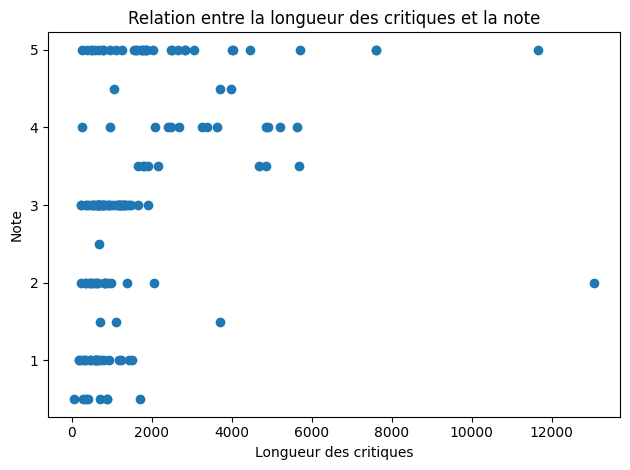

n: 16384; prob: 0.0100; p-value: +0.0000e+00
n: 16384; prob: 0.0200; p-value: +0.0000e+00
n: 16384; prob: 0.0300; p-value: +0.0000e+00
n: 16384; prob: 0.0400; p-value: +0.0000e+00
n: 16384; prob: 0.0500; p-value: +0.0000e+00
n: 16384; prob: 0.0600; p-value: +0.0000e+00
n: 16384; prob: 0.0700; p-value: +0.0000e+00
n: 16384; prob: 0.0800; p-value: +0.0000e+00
n: 16384; prob: 0.0900; p-value: +0.0000e+00
n: 16384; prob: 0.1000; p-value: +0.0000e+00
n: 16384; prob: 0.1100; p-value: +0.0000e+00
n: 16384; prob: 0.1200; p-value: +0.0000e+00
n: 16384; prob: 0.1300; p-value: +0.0000e+00
n: 16384; prob: 0.1400; p-value: +0.0000e+00
n: 16384; prob: 0.1500; p-value: +0.0000e+00
n: 16384; prob: 0.1600; p-value: +0.0000e+00
n: 16384; prob: 0.1700; p-value: +0.0000e+00
n: 16384; prob: 0.1800; p-value: +0.0000e+00
n: 16384; prob: 0.1900; p-value: +0.0000e+00
n: 16384; prob: 0.2000; p-value: +0.0000e+00
n: 16384; prob: 0.2100; p-value: +0.0000e+00
n: 16384; prob: 0.2200; p-value: +0.0000e+00
n: 16384; 

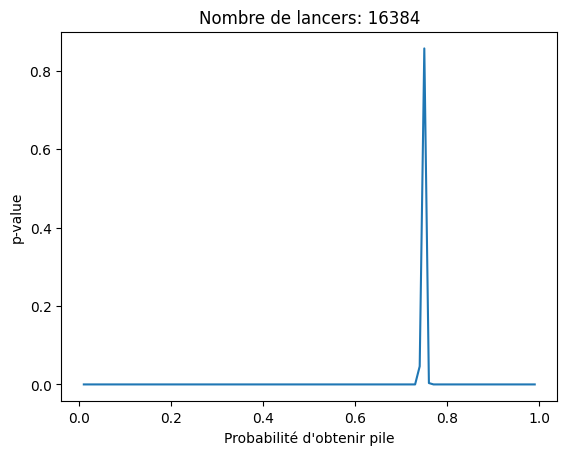

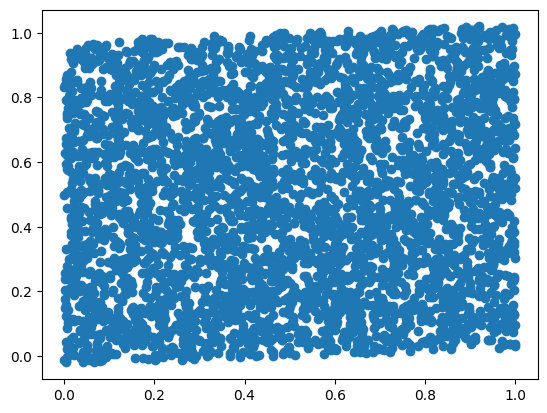

correlation: 0.0663; p-value: 0.0000


In [2]:
# Charger les données
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Calculer la longueur des critiques
df['length'] = df['reader_review'].apply(len)

# Extraire les colonnes de longueur et de note
length = df['length'].values
rating = df['rating'].values

# Normaliser les données
scaler = StandardScaler()
length_norm = scaler.fit_transform(length.reshape(-1, 1)).flatten()
rating_norm = scaler.fit_transform(rating.reshape(-1, 1)).flatten()

# Calculer les coefficients de corrélation
for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    pearson_corr, pearson_p = scipy.stats.pearsonr(length, rating, alternative=mode)
    print(f"Pearson: {pearson_corr:+.4e}; p-value: {pearson_p:+.4e}")
    spearman_corr, spearman_p = scipy.stats.spearmanr(length, rating, alternative=mode)
    print(f"Spearman: {spearman_corr:+.4e}; p-value: {spearman_p:+.4e}")

# Visualiser les données
plt.scatter(length, rating)
plt.xlabel("Longueur des critiques")
plt.ylabel("Note")
plt.title("Relation entre la longueur des critiques et la note")
plt.tight_layout()
plt.show()

# Simulation de lancer de pièces
def lancer_n_pieces(n=16, p=0.5):
    a = np.random.random(n)
    a = np.array(a >= p, dtype=np.int8)
    return a

n = 4096 * 4
x = []
y = []
for prob in np.linspace(0.01, 0.99, 99):
    serie_n_pieces = lancer_n_pieces(n=n, p=prob)
    result = scipy.stats.binomtest(k=sum(serie_n_pieces), n=n, p=0.25)
    print(f"n: {n}; prob: {prob:.4f}; p-value: {result.pvalue:+.4e}")
    x.append(prob)
    y.append(result.pvalue)

plt.plot(x, y)
plt.xlabel("Probabilité d'obtenir pile")
plt.ylabel("p-value")
plt.title(f"Nombre de lancers: {n}")
plt.show()

# Autre visualisation des données
n = 4096
a = np.random.random(n)
b = np.random.random(n)
a_delta_to_mu = a - np.mean(a)
b_delta_to_mu = b - np.mean(b)
a_delta_to_mu_norm = a_delta_to_mu / np.std(a)
b_delta_to_mu_norm = b_delta_to_mu / np.std(b)
b += a_delta_to_mu_norm * 0.015
plt.scatter(a, b)
plt.show()

corr, p = scipy.stats.pearsonr(a, b)
print(f"correlation: {corr:.4f}; p-value: {p:.4f}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 mots TF-IDF (positif) : filtered_word_count         233.760000
rating_norm                   1.154759
filtered_word_count_norm      0.569000
plus                          0.078197
tout                          0.070411
bien                          0.058263
comme                         0.048349
sans                          0.046890
cette                         0.046794
roman                         0.045308
dtype: float64
Top 10 mots TF-IDF (neutre) : filtered_word_count    106.100000
plus                     0.063341
roman                    0.049985
comme                    0.045300
bien                     0.045259
monde                    0.043428
si                       0.042240
livre                    0.040483
lecture                  0.039840
tout                     0.039734
dtype: float64
Top 10 mots TF-IDF (négatif) : filtered_word_count    86.140000
livre                   0.077353
bien                    0.050474
lecture                 0.044568
plus            

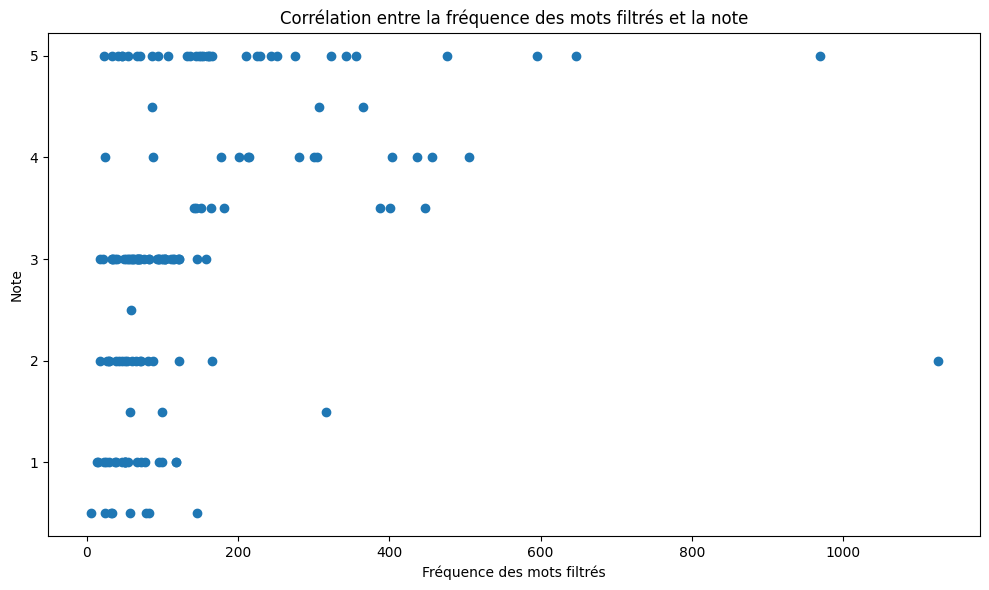

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Assurez-vous que les stopwords sont téléchargés
nltk.download('stopwords')
nltk.download('punkt')

# Charger les données
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Définir les stopwords
stop_words = set(stopwords.words('french'))

# Préparer les données : supprimer les stopwords et la ponctuation
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['reader_review'] = df['reader_review'].apply(preprocess_text)

# Calculer le TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['reader_review'])

# Ajouter les scores TF-IDF au DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)

# Calculer la fréquence des mots filtrés
df['filtered_word_count'] = df['reader_review'].apply(lambda x: len(x.split()))

# Normaliser les données
scaler = StandardScaler()
df['filtered_word_count_norm'] = scaler.fit_transform(df['filtered_word_count'].values.reshape(-1, 1)).flatten()
df['rating_norm'] = scaler.fit_transform(df['rating'].values.reshape(-1, 1)).flatten()

# Calculer les mots les plus importants pour chaque label
def get_top_tfidf_words_by_label(data, label, top_n=10):
    label_data = data[data['label'] == label]
    tfidf_means = label_data.iloc[:, 6:].mean()
    return tfidf_means.sort_values(ascending=False).head(top_n)

top_tfidf_words_pos = get_top_tfidf_words_by_label(df, 1)
top_tfidf_words_neu = get_top_tfidf_words_by_label(df, 0)
top_tfidf_words_neg = get_top_tfidf_words_by_label(df, -1)

print("Top 10 mots TF-IDF (positif) :", top_tfidf_words_pos)
print("Top 10 mots TF-IDF (neutre) :", top_tfidf_words_neu)
print("Top 10 mots TF-IDF (négatif) :", top_tfidf_words_neg)

# Calculer les coefficients de corrélation
for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("Corrélation pour les scores TF-IDF, mode:", mode)
    pearson_corr, pearson_p = scipy.stats.pearsonr(df['filtered_word_count_norm'], df['rating_norm'], alternative=mode)
    print(f"Pearson: {pearson_corr:+.4e}; p-value: {pearson_p:+.4e}")
    spearman_corr, spearman_p = scipy.stats.spearmanr(df['filtered_word_count_norm'], df['rating_norm'], alternative=mode)
    print(f"Spearman: {spearman_corr:+.4e}; p-value: {spearman_p:+.4e}")

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(df['filtered_word_count'], df['rating'])
plt.xlabel("Fréquence des mots filtrés")
plt.ylabel("Note")
plt.title("Corrélation entre la fréquence des mots filtrés et la note")
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from scipy.stats import spearmanr

# Charger le fichier CSV
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Convertir le label en valeurs numériques pour la corrélation (1 pour positif, 0 pour neutre, -1 pour négatif)
df['label_numeric'] = df['label']

# Calculer le nombre d'occurrences du mot "bien" dans chaque critique
df['bien_count'] = df['reader_review'].apply(lambda x: x.lower().count('bien'))

# Calculer le coefficient de corrélation de Spearman entre le label et le nombre d'occurrences du mot "bien"
correlation, p_value = spearmanr(df['label_numeric'], df['bien_count'])

# Afficher le coefficient de corrélation et la p-value
print(f"Corrélation de Spearman : {correlation}")
print(f"p-value : {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("La corrélation est statistiquement significative.")
else:
    print("La corrélation n'est pas statistiquement significative.")



Corrélation de Spearman : 0.26163666440172956
p-value : 0.0012202618546065967
La corrélation est statistiquement significative.


In [15]:
import pandas as pd
from scipy.stats import spearmanr

# Charger le fichier CSV
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Convertir le label en valeurs numériques pour la corrélation (1 pour positif, 0 pour neutre, -1 pour négatif)
df = df[df['label'] != 0]
df['sentiment'] = df['label']

# Calculer le nombre d'occurrences du mot "bien" dans chaque critique
df['bien_count'] = df['reader_review'].apply(lambda x: x.lower().count('bien'))

# Calculer les quartiles et l'IQR
Q1 = df['bien_count'].quantile(0.25)
Q3 = df['bien_count'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites des valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes
df_clean = df[(df['bien_count'] >= lower_bound) & (df['bien_count'] <= upper_bound)].copy()

# Calculer le coefficient de corrélation de Spearman et la p-valeur
correlation, p_value = spearmanr(df_clean['sentiment'], df_clean['bien_count'])

print(f"Corrélation de Spearman après élimination des données aberrantes : {correlation}")
print(f"p-value après élimination des données aberrantes : {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("La corrélation est statistiquement significative après élimination des données aberrantes.")
else:
    print("La corrélation n'est pas statistiquement significative après élimination des données aberrantes.")


Corrélation de Spearman après élimination des données aberrantes : 0.3118799017483947
p-value après élimination des données aberrantes : 0.0019794468258912297
La corrélation est statistiquement significative après élimination des données aberrantes.


In [16]:
import pandas as pd
from scipy.stats import spearmanr
import random

# Charger le fichier CSV
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Convertir le label en valeurs numériques pour la corrélation (1 pour positif, 0 pour neutre, -1 pour négatif) 
df = df[df['label'] != 0]
df['sentiment'] = df['label']

# Fonction pour compter le nombre d'occurrences du mot "bien"
def count_bien(text):
    return text.lower().count('bien')

# Fonction pour augmenter les données
def augment_text(text):
    words = text.split()
    if len(words) > 1:
        if random.random() < 0.33:
            # Supprimer un mot aléatoire
            del words[random.randint(0, len(words) - 1)]
        elif random.random() < 0.33:
            # Échanger les positions de deux mots aléatoires
            idx1 = random.randint(0, len(words) - 1)
            idx2 = random.randint(0, len(words) - 1)
            words[idx1], words[idx2] = words[idx2], words[idx1]
        else:
            # Insérer un "bien" à une position aléatoire
            insert_idx = random.randint(0, len(words))
            words.insert(insert_idx, "bien")
    return ' '.join(words)

# p-value originale
original_bien_count = df['reader_review'].apply(count_bien)
original_pvalue = spearmanr(df['sentiment'], original_bien_count)[1]

# Augmenter les données
df['augmented_reader_review'] = df['reader_review'].apply(augment_text)
enhanced_bien_count = df['augmented_reader_review'].apply(count_bien)

# p-value des données augmentées
enhanced_pvalue = spearmanr(df['sentiment'], enhanced_bien_count)[1]

print(f"p-value originale : {original_pvalue}")
print(f"p-value après augmentation : {enhanced_pvalue}")

# Interprétation des résultats
if enhanced_pvalue < 0.05:
    print("La corrélation est statistiquement significative après augmentation des données.")
else:
    print("La corrélation n'est pas statistiquement significative après augmentation des données.")


p-value originale : 0.0011086865286928454
p-value après augmentation : 0.010677127008951952
La corrélation est statistiquement significative après augmentation des données.


In [19]:
"""
utilisation de métriques génériques
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Charger les données
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Mapper les étiquettes des classes
df['label'] = df['label'].map({1: 1, 0: 0, -1: -1})

# Séparer le jeu de données en ensembles d'entraînement et de test
X = df['reader_review']
y = df['label']

# Diviser les données en ensembles d'entraînement et de test de manière aléatoire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les données textuelles en vecteurs numériques
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Utiliser un classifieur bayésien naïf multinomial comme exemple de modèle
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_vectors)

# Évaluation avec des métriques génériques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Rapport de classification détaillé
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

Accuracy: 0.5333333333333333
Precision: 0.7428571428571428
Recall: 0.5333333333333333
F1-Score: 0.4550868486352357
              precision    recall  f1-score   support

          -1       0.75      0.75      0.75         8
           0       1.00      0.08      0.15        12
           1       0.43      0.90      0.58        10

    accuracy                           0.53        30
   macro avg       0.73      0.58      0.49        30
weighted avg       0.74      0.53      0.46        30



Distribution des classes dans l'ensemble de données complet :
label
-1    50
 1    50
 0    50
Name: count, dtype: int64
Distribution des classes dans l'ensemble d'entraînement :
label
-1    40
 1    40
 0    40
Name: count, dtype: int64
Distribution des classes dans l'ensemble de test :
label
-1    10
 1    10
 0    10
Name: count, dtype: int64
Accuracy: 0.5333333333333333
Precision: 0.5272904483430799
Recall: 0.5333333333333333
F1-Score: 0.46087920951804795
              precision    recall  f1-score   support

          -1       0.56      0.50      0.53        10
           0       0.50      0.10      0.17        10
           1       0.53      1.00      0.69        10

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.46        30
weighted avg       0.53      0.53      0.46        30

Confusion Matrix:
[[ 5  1  4]
 [ 4  1  5]
 [ 0  0 10]]


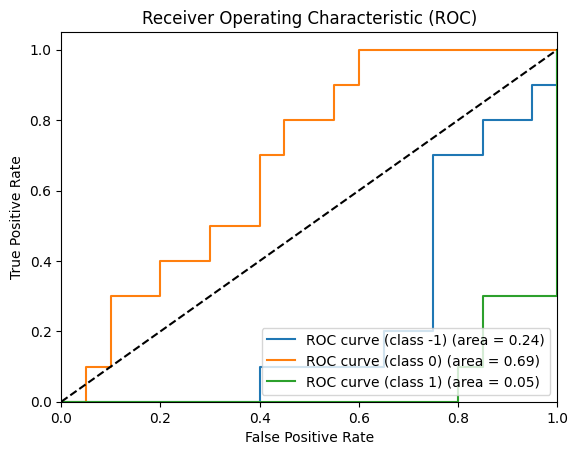

In [21]:
"""
utilisation de métriques adaptés à la tâche
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Mapper les étiquettes des classes
df['label'] = df['label'].map({1: 1, 0: 0, -1: -1})

# Vérifier la distribution des classes
print("Distribution des classes dans l'ensemble de données complet :")
print(df['label'].value_counts())

# Séparer le jeu de données en ensembles d'entraînement et de test
X = df['reader_review']
y = df['label']

# Diviser les données en ensembles d'entraînement et de test de manière aléatoire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérifier la distribution des classes dans les ensembles d'entraînement et de test
print("Distribution des classes dans l'ensemble d'entraînement :")
print(pd.Series(y_train).value_counts())
print("Distribution des classes dans l'ensemble de test :")
print(pd.Series(y_test).value_counts())

# Convertir les données textuelles en vecteurs numériques
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Utiliser un classifieur bayésien naïf multinomial comme exemple de modèle
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_vectors)
y_pred_proba = model.predict_proba(X_test_vectors)

# Évaluation avec des métriques génériques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Rapport de classification détaillé
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calcul de l'AUC et tracé de la courbe ROC
fpr = {}
tpr = {}
roc_auc = {}

# Assurer que chaque classe est présente dans les données de test pour éviter l'erreur
unique_classes = np.unique(y_test)
for cls in unique_classes:
    fpr[cls], tpr[cls], _ = roc_curve(y_test, y_pred_proba[:, cls], pos_label=cls)
    roc_auc[cls] = roc_auc_score(y_test == cls, y_pred_proba[:, cls])

# Tracer les courbes ROC
plt.figure()
for cls in unique_classes:
    plt.plot(fpr[cls], tpr[cls], label=f'ROC curve (class {cls}) (area = {roc_auc[cls]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Longueur moyenne des critiques par label:
label
-1    1010.54
 0    1253.88
 1    2741.88
Name: length, dtype: float64
Top 10 mots les plus fréquents par label:
Label -1: [('livre', 2.921113518456848), ('bien', 2.0967428161544883), ('plus', 2.0653247633494267), ('lecture', 1.6958208798109915), ('roman', 1.6038376407474177), ('si', 1.6019052933841458), ('cette', 1.5385743473070201), ('lire', 1.4339576070246716), ('tout', 1.416443611244996), ('très', 1.3428224633180383)]
Label 1: [('plus', 2.8784444068237627), ('tout', 2.316400837146685), ('bien', 2.150407933732272), ('comme', 1.663085706202277), ('hugo', 1.650989326480132), ('cette', 1.6456093583676423), ('roman', 1.6188873294088428), ('fait', 1.534160720153568), ('sans', 1.4674664328044542), ('aussi', 1.2938790900870576)]
Label 0: [('plus', 2.345650158717433), ('bien', 2.0014369970892365), ('roman', 1.916811741021026), ('livre', 1.7126869614293763), ('comme', 1.670573115176799), ('très', 1.5774705463861853), ('tout', 1.5718851853427926

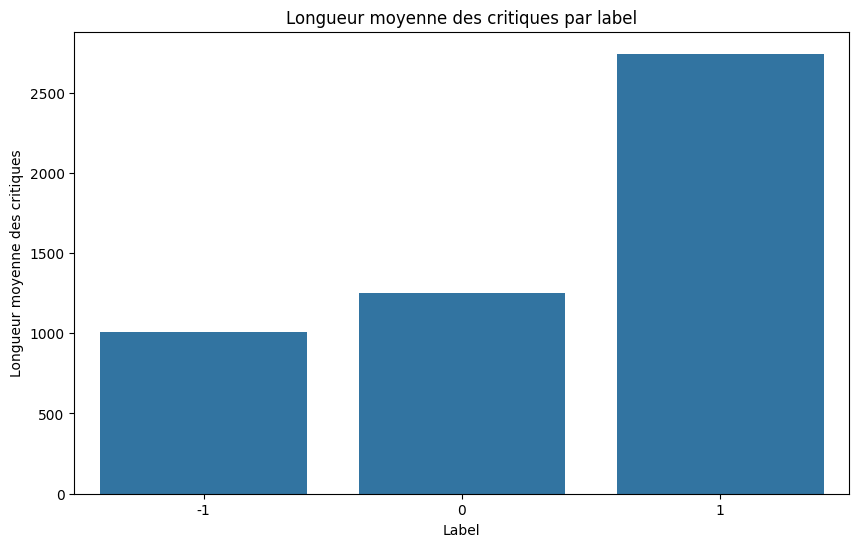

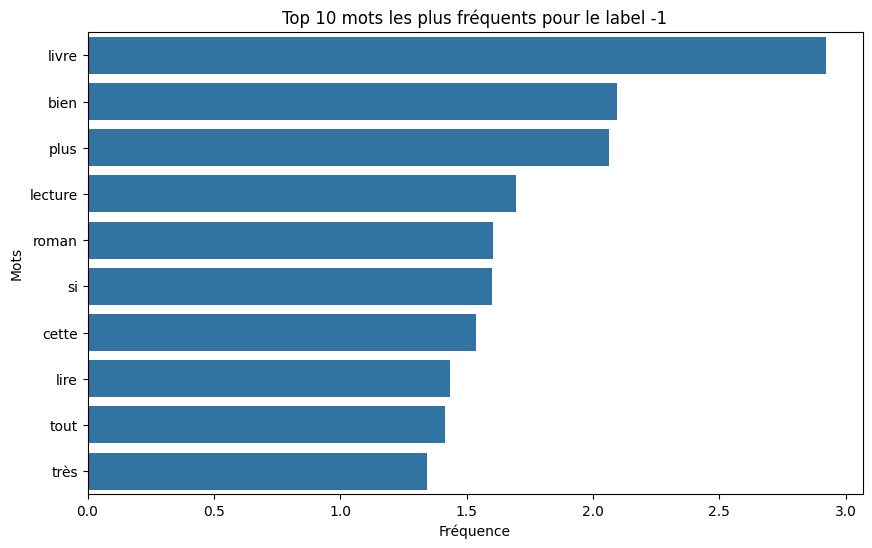

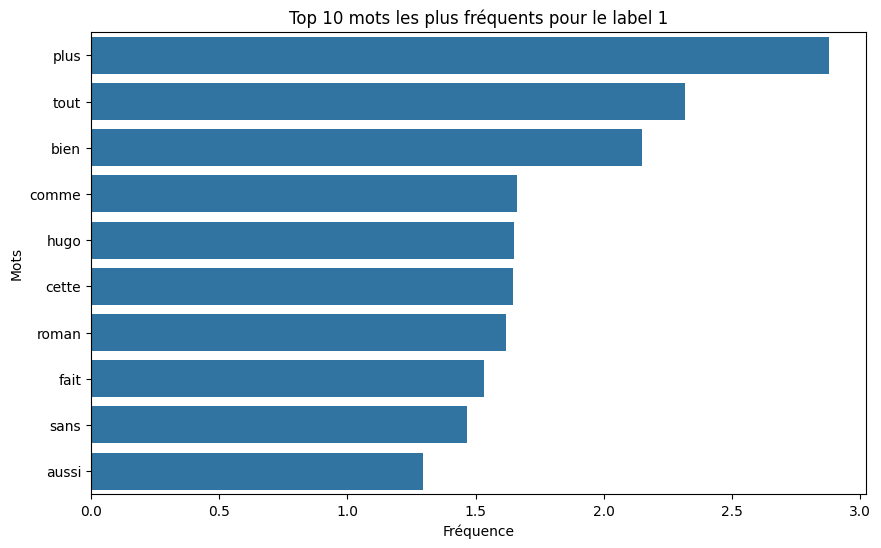

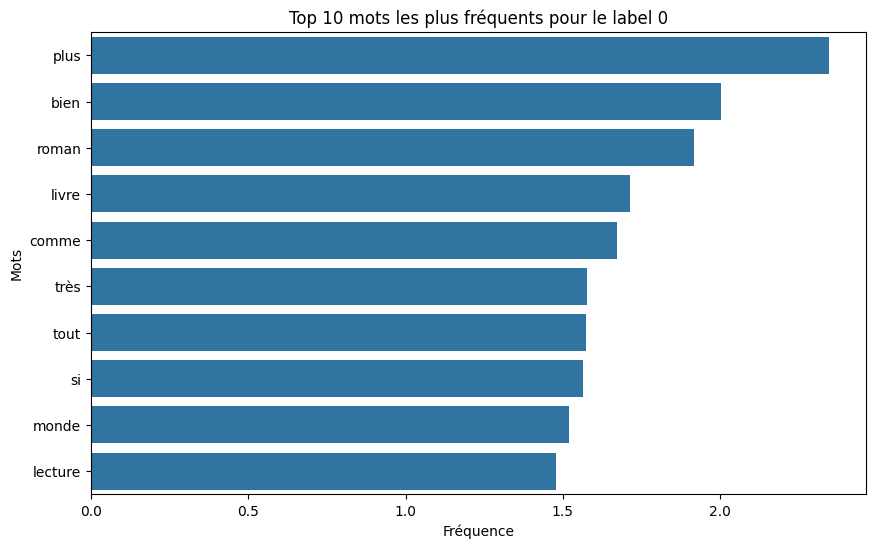

In [23]:
"""
proposer une métrique à mon corpus : ici on choisit les paramètrs longueur de texte de commentaire, distribution des mots les plus fréquents et le label" 
"""

# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

nltk.download('punkt')

# Charger les données
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Calculer la longueur des critiques
df['length'] = df['reader_review'].apply(len)

# Calculer la longueur moyenne des critiques pour chaque label
avg_length_by_label = df.groupby('label')['length'].mean()

print("Longueur moyenne des critiques par label:")
print(avg_length_by_label)

# Tokenizer les critiques
df['tokens'] = df['reader_review'].apply(nltk.word_tokenize)

# Supprimer les mots vides (stop words) et les ponctuations
stopwords = set(nltk.corpus.stopwords.words('french'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word.lower() not in stopwords])

# Rejoindre les tokens en une seule chaîne de caractères pour chaque critique
df['filtered_review'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Créer une fonction pour obtenir les mots les plus fréquents pour chaque label
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Obtenir les mots les plus fréquents pour chaque label
labels = df['label'].unique()
top_words_by_label = {}

for label in labels:
    top_words_by_label[label] = get_top_n_words(df[df['label'] == label]['filtered_review'], 10)

print("Top 10 mots les plus fréquents par label:")
for label, top_words in top_words_by_label.items():
    print(f"Label {label}: {top_words}")

# Visualiser la longueur moyenne des critiques par label
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length_by_label.index, y=avg_length_by_label.values)
plt.title('Longueur moyenne des critiques par label')
plt.xlabel('Label')
plt.ylabel('Longueur moyenne des critiques')
plt.show()

# Visualiser les mots les plus fréquents par label
for label, top_words in top_words_by_label.items():
    words, freqs = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.title(f'Top 10 mots les plus fréquents pour le label {label}')
    plt.xlabel('Fréquence')
    plt.ylabel('Mots')
    plt.show()

